For each question, submit one python function. Please submit your solutions as a .py file
on Canvas. Each should take in a multivariate input of independent variables (i.e. X) and
one dependent variable (i.e. y). The fastest solution will get 1 bonus point.
1. Implement multivariate linear regression using gradient descent. Your function
should take in a k-dimensional array and 1 one-dimensional array, then return a vector
of weights (sized K+1) that correspond to β0, β1, ..., βk. The first co-efficient β0 should
be the intercept.
2. Implement multivariate logistic regression using gradient descent. Your function
should take in a k-dimensional array and 1 one-dimensional array, then return a vector
of weights (sized K+1). The y values here are typically 0s or 1s.

For each of your solutions, explain your updating rule and loss function. Typeset the relevant
equations. This isn’t meant to be perfunctory; the point of this exercise is to understand
these algorithms both in writing and in code. (You can make a copy of this Latex document).

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Parameters
alpha = learning_rate = 0.04
iterations = 1000

In [135]:
n = 100
k = 20

beta = np.random.rand(k+1, 1)

X = np.random.randn(n, k) 

intercept = np.ones((n, 1))
X_design = np.hstack((intercept, X))


y = np.dot(X_design, beta) + np.random.randn(n,1)



In [136]:
def compute_cost(x, y, b1, b0):
    n = x.shape[0]
    y_pred = np.dot(np.ones((n, 1)), b0) + np.dot(x, b1)
    return (1/(2*n)) * np.sum((y_pred - y)**2)


In [145]:
%%time
# Gradient Descent Function
def gradient_descent(x, y, learning_rate, iterations):
    n, k = x.shape
    
    b1 = np.random.randn(k, 1)  # Slope
    b0 = np.random.randn(1,1) 

    ones_vector = np.ones((n, 1))

    cost_history = []
    b0_hist = []
    b1_hist = []
    
    for i in range(iterations):
        # Predict y values
        y_pred = np.dot(ones_vector, b0) + np.dot(x, b1)
        
        # Calculate gradients
        b1_gradient = (1/n) * np.dot(x.T, (y_pred-y))
        b0_gradient = (1/n) * np.sum(y_pred-y)
        
        # Update parameters
        b1 -= learning_rate * b1_gradient
        b0 -= learning_rate * b0_gradient
        
        # Calculate and store cost
        cost = compute_cost(x, y, b1, b0)
    
        cost_history.append(cost)
    

    beta = np.vstack((b0, b1))

    
    return beta, cost_history

# Run Gradient Descent
betas, cost_history = gradient_descent(X, y, alpha, iterations)

CPU times: user 34.1 ms, sys: 2.53 ms, total: 36.6 ms
Wall time: 35.2 ms


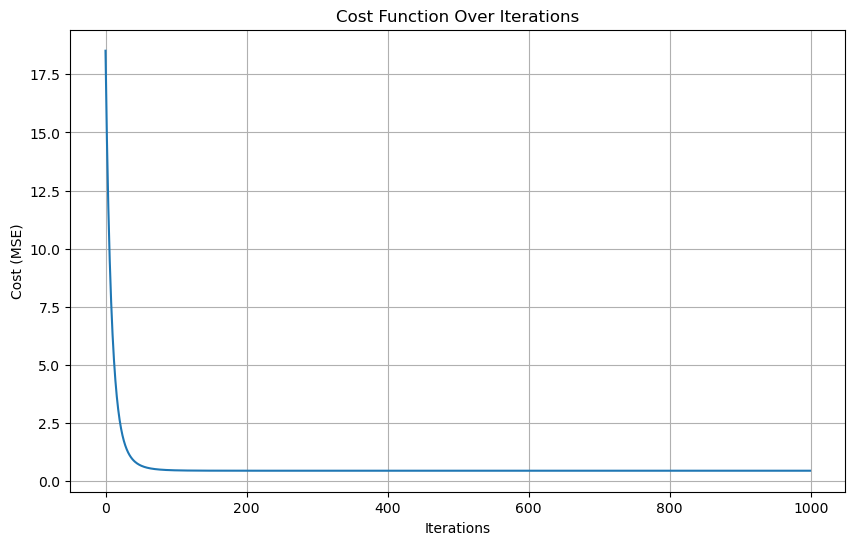

In [146]:
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.title("Cost Function Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()